In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn import tree
import graphviz

In [70]:
purchaseData = pd.read_csv('Purchase_Logistic.csv')
X = purchaseData.iloc[:, [2, 3]]
Y = purchaseData.iloc[:, 4]
Xtrain, Xtest, Ytrain, Ytest \
= train_test_split(X, Y, test_size = 0.25, random_state = 0) 

In [71]:
cf=DecisionTreeClassifier(max_depth=4);
cf.fit(Xtrain,Ytrain);
Ypred=cf.predict(Xtest)
cmat=confusion_matrix(Ytest,Ypred)

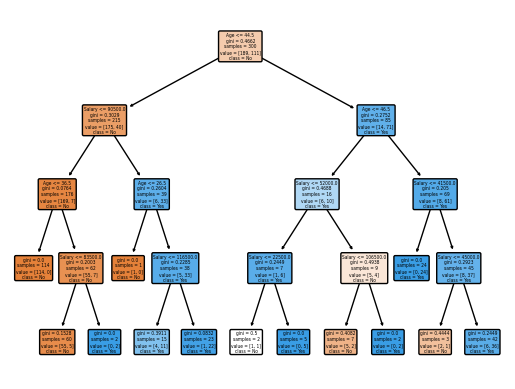

In [72]:
decPlot = plot_tree(decision_tree=cf, feature_names = ["Age", "Salary"], 
                     class_names =["No", "Yes"] , filled = True , precision = 4, rounded = True)

In [73]:
text_representation = tree.export_text(cf,  feature_names = ["Age","Salary"])
print(text_representation)

|--- Age <= 44.50
|   |--- Salary <= 90500.00
|   |   |--- Age <= 36.50
|   |   |   |--- class: 0
|   |   |--- Age >  36.50
|   |   |   |--- Salary <= 83500.00
|   |   |   |   |--- class: 0
|   |   |   |--- Salary >  83500.00
|   |   |   |   |--- class: 1
|   |--- Salary >  90500.00
|   |   |--- Age <= 26.50
|   |   |   |--- class: 0
|   |   |--- Age >  26.50
|   |   |   |--- Salary <= 116500.00
|   |   |   |   |--- class: 1
|   |   |   |--- Salary >  116500.00
|   |   |   |   |--- class: 1
|--- Age >  44.50
|   |--- Age <= 46.50
|   |   |--- Salary <= 52000.00
|   |   |   |--- Salary <= 22500.00
|   |   |   |   |--- class: 0
|   |   |   |--- Salary >  22500.00
|   |   |   |   |--- class: 1
|   |   |--- Salary >  52000.00
|   |   |   |--- Salary <= 106500.00
|   |   |   |   |--- class: 0
|   |   |   |--- Salary >  106500.00
|   |   |   |   |--- class: 1
|   |--- Age >  46.50
|   |   |--- Salary <= 41500.00
|   |   |   |--- class: 1
|   |   |--- Salary >  41500.00
|   |   |   |--- Salar

In [74]:
dot_data = tree.export_graphviz(cf, out_file=None, 
                     feature_names = ["Age", "Salary"],  
                     class_names =["No", "Yes"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data) 

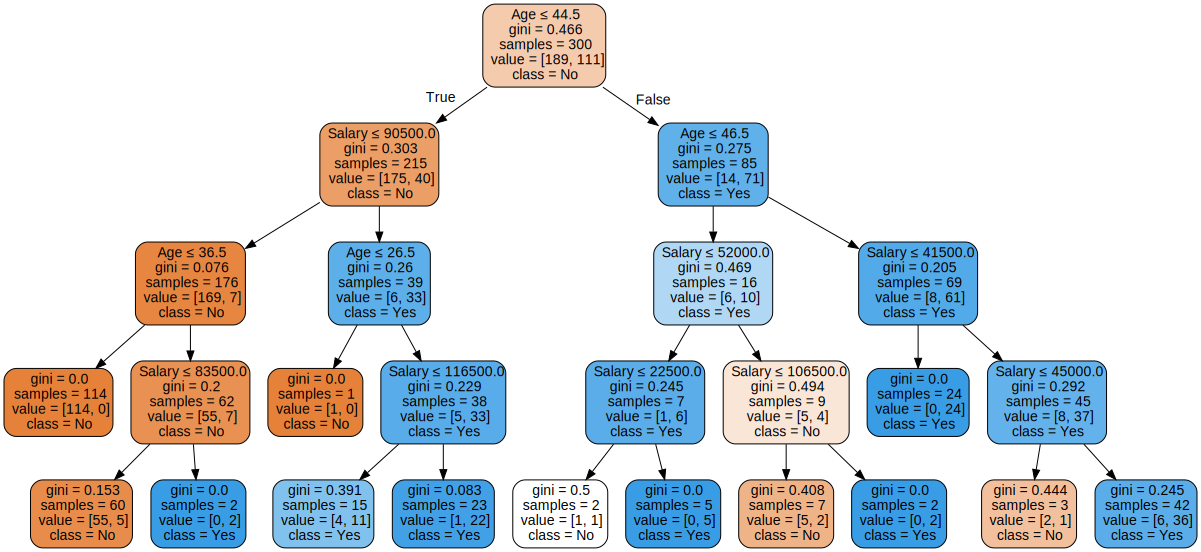

In [75]:
graph